In [1]:
import requests
import pandas as pd
import numpy as np

def run_query(query):  # A simple function to use requests.post to make the API call.
    headers = {'X-API-KEY': 'BQYCaXaMZlqZrPCSQVsiJrKtxKRVcSe4'}
    request = requests.post('https://graphql.bitquery.io/', json={'query': query}, headers=headers)
    if request.status_code == 200:
        return request.json()
    else:
        raise Exception('Query failed and return code is {}.{}'.format(request.status_code, query))

In [2]:
# Add the high voltage volts

In [10]:
ranges

DatetimeIndex([          '2021-12-15 00:00:00',
               '2021-12-16 20:10:54.545454545',
               '2021-12-18 16:21:49.090909090',
               '2021-12-20 12:32:43.636363636',
               '2021-12-22 08:43:38.181818181',
               '2021-12-24 04:54:32.727272727',
               '2021-12-26 01:05:27.272727272',
               '2021-12-27 21:16:21.818181818',
               '2021-12-29 17:27:16.363636363',
               '2021-12-31 13:38:10.909090909',
               '2022-01-02 09:49:05.454545454',
                         '2022-01-04 06:00:00',
               '2022-01-06 02:10:54.545454545',
               '2022-01-07 22:21:49.090909091',
               '2022-01-09 18:32:43.636363636',
               '2022-01-11 14:43:38.181818182',
               '2022-01-13 10:54:32.727272727',
               '2022-01-15 07:05:27.272727273',
               '2022-01-17 03:16:21.818181818',
               '2022-01-18 23:27:16.363636364',
               '2022-01-20 19:38:10.9090

In [11]:
# The GraphQL query

# 16 Dec 2021 - BTC Volt 01 Call - 3BjcHXvyzMsjmeqE2qFLx45K4XFx3JPiyRnjJiF5MAHt
# 17 Dec 2021 - SOL Volt 01 Call - 4Hnh1UCC6HLzx9NaGKnTVHR2bANcRrhydumdHCnrT3i2
# mSOL - 6UA3yn28XecAHLTwoCtjfzy3WcyQj1x13bxnH8urUiKt
# ETH Volt 01 Call - GjnoPUjQiEUYWuKAbMax2cM1Eony8Yutc133wuSun9hS
# FTT - 7wDh4VCTPwx41kvbLE6fkFgMEjnqw7NpGJvQtNabCm2B
# SRM - 5SLqZSywodLS8ih6U2AAioZrxpgR149hR8SApmCB7r5X
# MNGO - 4sTuzTYfcE2NF7zy6Sy8XhVcNLa6JQSLrx3roy97n4sD
# scnSOL - 5VmdHqvRMbXivuC34w4Hux9zb1y9moiBEQmXDrTR1kV
# SBR - DPMCwE9z9jXaDVDti5aKhdgCWGgsvioz6ZvB9eZjH7UE
# LUNA Volt 01 Call - 95sn4kgeJnnBfRCD8S2quu4HS9Y6vb7JDuXrarnmEjYE
dfs = []

ranges = pd.date_range(start="2021-12-15", end="2022-03-06", periods=40)
    
for i in range(len(ranges)):
    start = ranges[i].isoformat().replace("-","").replace(":","")
    end = ranges[i+1].isoformat().replace("-","").replace(":","")

    # Adjust date & account for query
    query = """
    query{
      solana(network: solana) {
        instructionAccounts(
          account: {in: [
            "4Hnh1UCC6HLzx9NaGKnTVHR2bANcRrhydumdHCnrT3i2",
            "3BjcHXvyzMsjmeqE2qFLx45K4XFx3JPiyRnjJiF5MAHt",
            "6UA3yn28XecAHLTwoCtjfzy3WcyQj1x13bxnH8urUiKt",
            "GjnoPUjQiEUYWuKAbMax2cM1Eony8Yutc133wuSun9hS",
            "7wDh4VCTPwx41kvbLE6fkFgMEjnqw7NpGJvQtNabCm2B",
            "5SLqZSywodLS8ih6U2AAioZrxpgR149hR8SApmCB7r5X",
            "4sTuzTYfcE2NF7zy6Sy8XhVcNLa6JQSLrx3roy97n4sD",
            "5VmdHqvRMbXivuC34w4Hux9zb1y9moiBEQmXDrTR1kV",
            "DPMCwE9z9jXaDVDti5aKhdgCWGgsvioz6ZvB9eZjH7UE",
            "95sn4kgeJnnBfRCD8S2quu4HS9Y6vb7JDuXrarnmEjYE",
            "6Nkc8MEiz3WLz1xthYitmSuy3NGwn7782upRHo2iFmXK",
            "GrB6vbG2WP7eEnbwgxUbBGRMeXYq139jo2o9oW8cNK8f",
            "AQRGh6PU7LzDHvvoPNS7wVVQaCBeftw9kVDAnvuEjbs8",
            "EA29Xf3HGMtYziw7UKZDUKby7gkoCbXwmiNKwc7z54Ax",
            "5kA7FPiB3t2X5s65dK1AoEu5asDjC5d7f5vaB4iY2yrj",
            "CVrRw6VtxSjokm2tKmaS5RCuoc9EFjN4wEoov6f2PST6",
            "DNa849drqW19uBV5X9ohpJ5brRGzq856gk3HDRqveFrA",
            "G8jsAWUA2KdDn7XmV1sBqUdbEXESaPdjPWDEYCsnkRX2",
            ]}
          date: {after: "%s", before: "%s"}
          success: {is: true}
        ) {
          account {
            name
          }
          date {
            date
          }
          transaction {
            feePayer
          }
        }
      }
    }
    """
    result = run_query(query%(start, end))  # Execute the query
    # print('Result - {}'.format(result))
    result

    # convert GraphQL json to pandas dataframe
    df = pd.json_normalize(result['data']['solana']['instructionAccounts'])

    # rename to assets name
    asset_conditions = [
        (df['account.name'] == "4Hnh1UCC6HLzx9NaGKnTVHR2bANcRrhydumdHCnrT3i2"),
        (df['account.name'] == "3BjcHXvyzMsjmeqE2qFLx45K4XFx3JPiyRnjJiF5MAHt"),
        (df['account.name'] == "6UA3yn28XecAHLTwoCtjfzy3WcyQj1x13bxnH8urUiKt"),
        (df['account.name'] == "GjnoPUjQiEUYWuKAbMax2cM1Eony8Yutc133wuSun9hS"),
        (df['account.name'] == "7wDh4VCTPwx41kvbLE6fkFgMEjnqw7NpGJvQtNabCm2B"),
        (df['account.name'] == "5SLqZSywodLS8ih6U2AAioZrxpgR149hR8SApmCB7r5X"),
        (df['account.name'] == "4sTuzTYfcE2NF7zy6Sy8XhVcNLa6JQSLrx3roy97n4sD"),
        (df['account.name'] == "5VmdHqvRMbXivuC34w4Hux9zb1y9moiBEQmXDrTR1kV"),
        (df['account.name'] == "DPMCwE9z9jXaDVDti5aKhdgCWGgsvioz6ZvB9eZjH7UE"),
        (df['account.name'] == "95sn4kgeJnnBfRCD8S2quu4HS9Y6vb7JDuXrarnmEjYE"),

        (df['account.name'] == "6Nkc8MEiz3WLz1xthYitmSuy3NGwn7782upRHo2iFmXK"),    
        (df['account.name'] == "GrB6vbG2WP7eEnbwgxUbBGRMeXYq139jo2o9oW8cNK8f"),
        (df['account.name'] == "AQRGh6PU7LzDHvvoPNS7wVVQaCBeftw9kVDAnvuEjbs8"),    
        (df['account.name'] == "EA29Xf3HGMtYziw7UKZDUKby7gkoCbXwmiNKwc7z54Ax"),
        (df['account.name'] == "5kA7FPiB3t2X5s65dK1AoEu5asDjC5d7f5vaB4iY2yrj"),    
        (df['account.name'] == "CVrRw6VtxSjokm2tKmaS5RCuoc9EFjN4wEoov6f2PST6"),

        
        (df['account.name'] == "DNa849drqW19uBV5X9ohpJ5brRGzq856gk3HDRqveFrA"),    
        (df['account.name'] == "G8jsAWUA2KdDn7XmV1sBqUdbEXESaPdjPWDEYCsnkRX2"),
    ]

    asset_Categories = ['SOL', 'BTC', 'mSOL', 'ETH', 'FTT', 'SRM', 'MNGO', 'scnSOL', 'SBR', 'LUNA', 
                        "SOL_P", "BTC_P", "SOL (tsUSDC)_P", "ETH_P", "LUNA_P", "MNGO_P", "SOL_HIGH_C", "SOL_HIGH_P"]
    df['account.name'] = np.select(asset_conditions, asset_Categories)

    df
    print(start, df.shape)

    dfs.append(df)

20211215T000000 (3, 3)
20211217T015046.153846153 (14, 3)
20211219T034132.307692307 (292, 3)
20211221T053218.461538461 (342, 3)
20211223T072304.615384615 (279, 3)
20211225T091350.769230769 (237, 3)
20211227T110436.923076923 (282, 3)
20211229T125523.076923077 (683, 3)
20211231T144609.230769230 (248, 3)
20220102T163655.384615384 (675, 3)
20220104T182741.538461538 (403, 3)
20220106T201827.692307692 (630, 3)
20220108T220913.846153846 (532, 3)
20220111T000000 (405, 3)
20220113T015046.153846154 (1105, 3)
20220115T034132.307692307 (532, 3)
20220117T053218.461538461 (430, 3)
20220119T072304.615384615 (417, 3)
20220121T091350.769230769 (372, 3)
20220123T110436.923076923 (435, 3)
20220125T125523.076923077 (337, 3)
20220127T144609.230769230 (1145, 3)
20220129T163655.384615384 (410, 3)
20220131T182741.538461538 (377, 3)
20220202T201827.692307692 (476, 3)
20220204T220913.846153846 (855, 3)
20220207T000000 (262, 3)
20220209T015046.153846154 (357, 3)
20220211T034132.307692308 (359, 3)
20220213T053218.

IndexError: index 40 is out of bounds for axis 0 with size 40

In [12]:
result

{'data': {'solana': {'instructionAccounts': [{'account': {'name': '3BjcHXvyzMsjmeqE2qFLx45K4XFx3JPiyRnjJiF5MAHt'},
     'date': {'date': '2022-03-04'},
     'transaction': {'feePayer': '2ceEJCVJHwSf9cvtrCAkhWXBcUZVKhGY2W4TSW5qxGsk'}},
    {'account': {'name': '3BjcHXvyzMsjmeqE2qFLx45K4XFx3JPiyRnjJiF5MAHt'},
     'date': {'date': '2022-03-04'},
     'transaction': {'feePayer': '3AAC8uMMZ6zyA2fRoGYshWoZMzy4fzxWmNXPKFzNG4qi'}},
    {'account': {'name': '3BjcHXvyzMsjmeqE2qFLx45K4XFx3JPiyRnjJiF5MAHt'},
     'date': {'date': '2022-03-04'},
     'transaction': {'feePayer': '5ZMBKT5AnWu4tWA4fW63MUJixQNp4qj3DadXNzpLYSvT'}},
    {'account': {'name': '3BjcHXvyzMsjmeqE2qFLx45K4XFx3JPiyRnjJiF5MAHt'},
     'date': {'date': '2022-03-04'},
     'transaction': {'feePayer': '5k7LCfaBT15uPeY2KEQdeKT8U71JywYa3SrDjinfpRjS'}},
    {'account': {'name': '3BjcHXvyzMsjmeqE2qFLx45K4XFx3JPiyRnjJiF5MAHt'},
     'date': {'date': '2022-03-04'},
     'transaction': {'feePayer': '6fDS4Mh8bhgyVqn4xeDmxUMGfq2bgD3xUCUMiB

In [13]:
zz = pd.concat(dfs)

In [14]:
zz["transaction.feePayer"].unique().shape

(7034,)

In [15]:
dups = zz.drop_duplicates(subset="transaction.feePayer", keep='first')

Text(0, 0.5, 'Unique Volt Users')

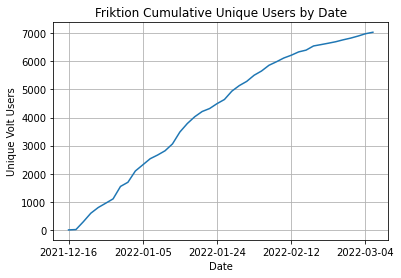

In [16]:
import matplotlib.pyplot as plt

dups.groupby("date.date")["transaction.feePayer"].count().cumsum().plot(grid=True)
plt.title("Friktion Cumulative Unique Users by Date")
plt.xlabel("Date")
plt.ylabel("Unique Volt Users")

Text(0, 0.5, 'Unique Users')

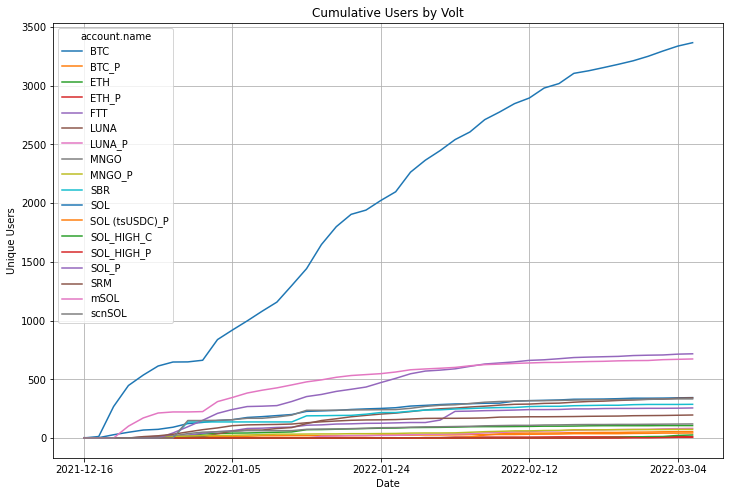

In [17]:
ax = plt.figure(figsize=(12, 8)).gca()
dups.groupby(["account.name", "date.date"])["transaction.feePayer"].count().unstack(0).fillna(0).cumsum().plot(grid=True, ax=ax)
plt.title("Cumulative Users by Volt")
plt.xlabel("Date")
plt.ylabel("Unique Users")


In [18]:
zz.groupby("account.name")[["transaction.feePayer"]].count().sort_values("transaction.feePayer")[::-1]

,transaction.feePayer
account.name,
SOL,5377
SOL_P,2063
mSOL,1769
LUNA,1369
SBR,832
BTC,791
FTT,710
scnSOL,628
SRM,500


In [50]:
highs = set(zz.loc[zz["account.name"]=="SOL_HIGH_C"]["transaction.feePayer"].unique())
lows = set(zz.loc[zz["account.name"]=="SOL_HIGH_P"]["transaction.feePayer"].unique())


from datetime import datetime

zz["date"] = pd.to_datetime(zz["date.date"])

before = set(zz.loc[zz["date"] < datetime(2022, 2, 25)]["transaction.feePayer"].unique())

In [51]:
len(highs.intersection(before))

86

In [52]:
len(lows.intersection(before))

31

In [ ]:
df = df.groupby(['account.name', 'date.date']).size().reset_index(name='count')

In [12]:
# save to csv
df.columns = ['asset', 'date', 'unique_users']
df.to_csv("asset.csv")

In [13]:
df

,asset,date,unique_users
0,BTC,2022-01-30,16
1,BTC,2022-01-31,6
2,BTC,2022-02-01,12
3,BTC,2022-02-02,11
4,BTC,2022-02-03,2
5,ETH,2022-01-30,10
6,ETH,2022-01-31,6
7,ETH,2022-02-01,8
8,ETH,2022-02-02,14
9,ETH,2022-02-03,3
